In [208]:
import numpy as np
import random
def euclidean_distance(centroids,data):
    distances = centroids.apply(lambda centroids : np.sqrt(np.sum((data - centroids)**2, axis=1)))
    return distances

def initial_points(data,k):
    centroids =[]
    for i in range(k):
        centroid = data.apply(lambda x : float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)
  


In [209]:
def get_labels(distances):
    return distances.idxmin(axis=1)

In [210]:
def update_centroids(labels):
    new_centroids = data.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T
    return new_centroids

In [211]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [212]:
def plot_clusters(data,labels,centroids, iteration):
    pca = PCA(n_components = 2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration{iteration}')
    plt.scatter(x= data_2d[:,0], y =data_2d[:,1], c= labels)
    plt.scatter(x= centroids_2d[:,0], y =centroids_2d[:,1])
    plt.show()

In [213]:
import pandas as pd
data = pd.read_csv('/Users/Anushruti/guptaa/auto-mpg.csv')

In [214]:
data


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
388,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
389,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
390,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [215]:
features = ["mpg","cylinders", "displacement","horsepower","weight", "acceleration"]
data = data.dropna(subset = features)

In [216]:
data = data[features]

In [217]:
data


,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8.0,307.0,130.0,3504.0,12.0
1,15.0,8.0,350.0,165.0,3693.0,11.5
2,18.0,8.0,318.0,150.0,3436.0,11.0
3,16.0,8.0,304.0,150.0,3433.0,12.0
4,17.0,8.0,302.0,140.0,3449.0,10.5
...,...,...,...,...,...,...
387,27.0,4.0,140.0,86.0,2790.0,15.6
388,44.0,4.0,97.0,52.0,2130.0,24.6
389,32.0,4.0,135.0,84.0,2295.0,11.6
390,28.0,4.0,120.0,79.0,2625.0,18.6


In [218]:
data = ((data- data.min())/(data.max()-data.min()))*9 + 1

In [219]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.00000,392.000000,392.000000,392.000000,392.000000
mean,4.457800,5.44949,3.939814,3.859916,4.482069,5.039996
std,1.868220,3.07041,2.433581,1.882720,2.167458,1.477963
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,2.914894,2.80000,1.860465,2.418478,2.562305,4.093750
50%,4.291223,2.80000,2.930233,3.323370,4.037851,5.017857
75%,5.787234,10.00000,5.831395,4.913043,6.107953,5.834821
max,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000


In [220]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,3.154255,10.0,6.558140,5.108696,5.825347,3.142857
1,2.436170,10.0,7.558140,6.820652,6.307627,2.875000
2,3.154255,10.0,6.813953,6.086957,5.651829,2.607143
3,2.675532,10.0,6.488372,6.086957,5.644174,3.142857
4,2.914894,10.0,6.441860,5.597826,5.685001,2.339286


In [221]:
centroids = initial_points(data, 3)

In [222]:
centroids

,0,1,2
mpg,6.242021,6.385638,6.026596
cylinders,10.000000,2.800000,10.000000
displacement,2.930233,1.674419,6.441860
horsepower,5.842391,3.152174,6.086957
weight,3.278707,3.863056,5.685001
acceleration,7.482143,2.607143,6.035714


In [223]:
euclidean_distance(centroids, data)

,0,1,2
0,6.967718,9.700418,4.196329
1,8.201167,11.025510,5.005329
2,7.353552,10.025433,4.488318
3,7.061505,10.042478,4.427424
4,7.463267,9.797296,4.856493
...,...,...,...
387,8.212299,2.879390,8.950224
388,9.522290,8.238441,11.618149
389,9.054012,1.498445,9.792844
390,8.000074,4.234709,9.320869


In [224]:
distances = euclidean_distance(centroids,data)

In [225]:
labels = get_labels(distances)

In [226]:
labels.value_counts()

1    224
2    160
0      8
dtype: int64

In [227]:
new_centroids = update_centroids(labels)


In [228]:
new_centroids

,0,1,2
mpg,4.282672,5.499677,2.643405
cylinders,6.400000,2.957403,8.530051
displacement,3.821416,1.992471,6.358255
horsepower,3.086412,2.586240,5.220176
weight,4.628445,2.748333,6.551186
acceleration,6.048098,5.318719,4.119839


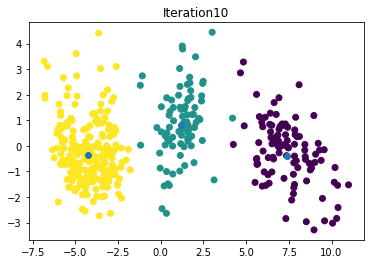

In [232]:
max_iteration = 100
k=3
centroids = initial_points(data, k)
old_centroids = pd.DataFrame()
iteration= 1

while(iteration< max_iteration and not centroids.equals(old_centroids)):
      old_centroids = centroids
      distances= euclidean_distance(centroids,data)
      labels = get_labels(distances)
      centroids = update_centroids(labels)
      plot_clusters(data, labels, centroids, iteration)
      iteration +=1
    
    